# Análise Gráfica das implementações da Mochila (Knapsack)

<em>Feito por <b>Lucas Guerreiro Pellegrini</b></em>
<em> e <b>Gabriel Teodoro Ribeiro;</b></em>

<em>Para a disciplina de Análise de Algoritmos.</em>

### Código:

In [1]:
import numpy as np
import math
import tracemalloc
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [2]:
PESO = 1
VALOR = 0

<h3 align="center"> Implementação Recursiva: </h3>

In [3]:
def mochila_exponencial(k, coisas, n):
    if n == 0:
        if coisas[n][PESO] <= k:
            return coisas[n][VALOR]
        return 0

    valorCom = -1
    if k >= coisas[n][PESO]:
        valorCom = mochila_exponencial(k - coisas[n][PESO], coisas, n - 1) + coisas[n][VALOR]

    valorSem = mochila_exponencial(k, coisas, n - 1)

    return max(valorCom, valorSem)

<h3 align="center"> Implementação Memoizada: </h3>

In [4]:
class MochilaMemo:
    def __init__(self):
        self.dic = {}

    def resolve(self, k, coisas, n):
        if n == 0:
            if coisas[n][PESO] <= k:
                return coisas[n][VALOR]
            return 0

        if (n, k) in self.dic:
            return self.dic[(n, k)]

        # Calcula o possível valor sem o elemento
        valorSem = self.resolve(k, coisas, n - 1)

        # Calcula o possível valor com o elemento
        if k >= coisas[n][PESO]:
            valorCom = self.resolve(k - coisas[n][PESO], coisas, n - 1) + coisas[n][VALOR]
            self.dic[(n, k)] = max(valorCom, valorSem)
        # Se não cabe, é sem mesmo
        else:
            self.dic[(n, k)] = valorSem

        return self.dic[(n, k)]

<h3 align="center"> Implementação com Programação Dinâmica: </h3>

In [5]:
class MochilaPD:
    def __init__(self):
        self.matriz = [[]]
        self.resposta = -1

    def resolve(self, k, coisas):
        self.matriz = np.zeros((len(coisas), k+1))

        for i in range(len(coisas)):
            for c in range(0, k+1):
                if coisas[i - 1][PESO] > c:
                    self.matriz[i][c] = self.matriz[i - 1][c]
                else:
                    menorSem = self.matriz[i - 1][c]
                    menorCom = self.matriz[i - 1][c - coisas[i - 1][PESO]] + coisas[i - 1][VALOR]
                    self.matriz[i][c] = max(menorSem, menorCom)

        self.acha_maior()

    def acha_maior(self):
        for linha in self.matriz:
            for elem in linha:
                if elem > self.resposta:
                    self.resposta = elem

<h3 align="center"> Implementação Aproximada (IK): </h3>

In [6]:
class MochilaA:
    def __init__(self):
        self.matriz = [[]]
        self.resposta = -1

    def resolve(self, k, coisas, epsilon = 0.2):
        coisas = self.pre_processamento_IK(k, coisas, epsilon)

        self.matriz = np.zeros((len(coisas), k+1))

        for i in range(len(coisas)):
            for c in range(0, k+1):
                if coisas[i - 1][PESO] > c:
                    self.matriz[i][c] = self.matriz[i - 1][c]
                else:
                    menorSem = self.matriz[i - 1][c]
                    menorCom = self.matriz[i - 1][c - coisas[i - 1][PESO]] + coisas[i - 1][VALOR]
                    self.matriz[i][c] = max(menorSem, menorCom)

        self.acha_maior()

    def acha_maior(self):
        for linha in self.matriz:
            for elem in linha:
                if elem > self.resposta:
                    self.resposta = elem

    def pre_processamento_IK(self, k, coisas, epsilon):
        # Remove elementos com peso maior que a capacidade
        coisas[:] = [x for x in coisas if x[PESO] <= k]

        # IBARRA-KIM
        sigma = max(coisas)[VALOR]
        #epsilon = np.random.ranf()
        print(f"\u03B5 = {epsilon}")
        lmbd = (epsilon * sigma) / (len(coisas)-1)

        u = []
        for valor, peso in coisas:
            u.append(tuple((int(math.floor(valor/lmbd)), peso)))
            
        return u

<h2><center> Testes: </center></h2>

In [7]:
lista_coisas = [(10, 5), (40, 4), (30, 6), (50, 3)]
lista_coisas2 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25)]
lista_coisas3 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25), (100, 28), (105, 30), (110, 30), (112, 29), (120, 32), (124, 33), (130, 40),
                     (131, 31), (129, 46), (150, 40), (155, 45), (170, 60), (169, 58)]
lista_coisas4 = [(10, 5), (40, 4), (30, 6), (50, 3), (15, 5), (26, 4), (21, 6), (17, 3), (12, 2), (24, 3), (22, 6),
                     (21, 3), (18, 2), (36, 4), (55, 9), (60, 7), (35, 6), (25, 12), (80, 9), (55, 15), (40, 15),
                     (79, 19), (99, 25), (100, 28), (105, 30), (110, 30), (112, 29), (120, 32), (124, 33), (130, 40),
                     (131, 31), (129, 46), (150, 40), (155, 45), (170, 60), (169, 58), (170, 60), (170, 60), (180, 65),
                     (181, 62), (185, 70), (190, 80), (199, 85), (185, 75), (200, 100), (210, 105), (220, 106), (250, 120)]

<div class="alert alert-block alert-warning"><b>Sobre os testes: </b> Os testes consistem em executar o algoritmo com as mesmas entradas; sendo elas as 4 listas "lista_coisasX" e suas respectivas capacidades: 15, 40, 100, 130 </div>

<h4><center> Teste 1: </center></h4>

###### Algoritmo Recursivo:

In [8]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(15, lista_coisas, len(lista_coisas)-1)

end = timer()
_, pico1r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t1r}s")
print(f"Pico de memória: {pico1r}b")

Resultado: 120
Tempo gasto: 0.0001554999999999751s
Pico de memória: 13407b


###### Algoritmo Memoizado:

In [9]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(15, lista_coisas, len(lista_coisas)-1)

end = timer()
_, pico1m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t1m}s")
print(f"Pico de memória: {pico1m}b")

Resultado: 120
Tempo gasto: 0.0001592000000005811s
Pico de memória: 13777b


###### Algoritmo de Programação Dinâmica:

In [10]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(15, lista_coisas)

end = timer()
_, pico1p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t1p}s")
print(f"Pico de memória: {pico1p}b")

Resultado: 120.0
Tempo gasto: 0.000560000000000116s
Pico de memória: 13153b


###### Algoritmo de Aproximação:

In [11]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(15, lista_coisas)

end = timer()
_, pico1a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t1a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t1a}s")
print(f"Pico de memória: {pico1a}b")

ε = 0.2
Resultado: 36.0
Tempo gasto: 0.0008609999999986684s
Pico de memória: 15312b


<h4><center> Teste 2: </center></h4>

###### Algoritmo Recursivo:

In [12]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(40, lista_coisas2, len(lista_coisas2)-1)

end = timer()
_, pico2r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t2r}s")
print(f"Pico de memória: {pico2r}b")

Resultado: 358
Tempo gasto: 0.24463179999999873s
Pico de memória: 170827b


###### Algoritmo Memoizado:

In [13]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(40, lista_coisas2, len(lista_coisas2)-1)

end = timer()
_, pico2m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t2m}s")
print(f"Pico de memória: {pico2m}b")

Resultado: 358
Tempo gasto: 0.0017960999999999672s
Pico de memória: 40426b


###### Algoritmo de Programação Dinâmica:

In [14]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(40, lista_coisas2)

end = timer()
_, pico2p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t2p}s")
print(f"Pico de memória: {pico2p}b")

Resultado: 358.0
Tempo gasto: 0.005591700000000088s
Pico de memória: 18809b


###### Algoritmo de Aproximação:

In [15]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(40, lista_coisas2)

end = timer()
_, pico2a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t2a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t2a}s")
print(f"Pico de memória: {pico2a}b")

ε = 0.2
Resultado: 393.0
Tempo gasto: 0.006422500000002884s
Pico de memória: 21326b


<h4><center> Teste 3: </center></h4>

###### Algoritmo Recursivo:

In [16]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(100, lista_coisas3, len(lista_coisas3)-1)

end = timer()
_, pico3r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t3r}s")
print(f"Pico de memória: {pico3r}b")

Resultado: 645
Tempo gasto: 31.523111s
Pico de memória: 176542b


###### Algoritmo Memoizado:

In [17]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(100, lista_coisas3, len(lista_coisas3)-1)

end = timer()
_, pico3m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t3m}s")
print(f"Pico de memória: {pico3m}b")

Resultado: 645
Tempo gasto: 0.006206000000005929s
Pico de memória: 164537b


###### Algoritmo de Programação Dinâmica:

In [18]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(100, lista_coisas3)

end = timer()
_, pico3p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t3p}s")
print(f"Pico de memória: {pico3p}b")

Resultado: 645.0
Tempo gasto: 0.020576399999995942s
Pico de memória: 41232b


###### Algoritmo de Aproximação:

In [19]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(100, lista_coisas3)

end = timer()
_, pico3a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t3a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t3a}s")
print(f"Pico de memória: {pico3a}b")

ε = 0.2
Resultado: 656.0
Tempo gasto: 0.02159120000000314s
Pico de memória: 42650b


<h4><center> Teste 4: </center></h4>

###### Algoritmo Recursivo:

In [20]:
tracemalloc.start()
start = timer()

resultado = mochila_exponencial(130, lista_coisas4, len(lista_coisas4)-1)

end = timer()
_, pico4r = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4r = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t4r}s")
print(f"Pico de memória: {pico4r}b")

Resultado: 769
Tempo gasto: 166.598144s
Pico de memória: 160888b


###### Algoritmo Memoizado:

In [21]:
mochila = MochilaMemo()
tracemalloc.start()
start = timer()

resultado = mochila.resolve(130, lista_coisas4, len(lista_coisas4)-1)

end = timer()
_, pico4m = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4m = end - start
print(f"Resultado: {resultado}")
print(f"Tempo gasto: {t4m}s")
print(f"Pico de memória: {pico4m}b")

Resultado: 769
Tempo gasto: 0.00952770000003511s
Pico de memória: 294242b


###### Algoritmo de Programação Dinâmica:

In [22]:
mochila = MochilaPD()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4)

end = timer()
_, pico4p = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4p = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t4p}s")
print(f"Pico de memória: {pico4p}b")

Resultado: 769.0
Tempo gasto: 0.034031999999967866s
Pico de memória: 63144b


###### Algoritmo de Aproximação:

In [23]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4)

end = timer()
_, pico4a = tracemalloc.get_traced_memory()
tracemalloc.stop()

t4a = end - start
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t4a}s")
print(f"Pico de memória: {pico4a}b")

ε = 0.2
Resultado: 714.0
Tempo gasto: 0.03353399999997464s
Pico de memória: 63376b


<h2><center> Análise Gráfica e Conclusão: </center></h2>

<div class="alert alert-block alert-warning"><b>Sobre o tamanho da entrada: </b> Como a entrada consiste de dois elementos (a lista de coisas e a capacidade da mochila), consideraremos como tamanho de entrada cada um dos 4 testes. </div>

<h3><center> Testes Individuais: </center></h3>

### Crescimento do Algoritmo Recursivo, de acordo com o crescimento da entrada:

###### Memória:

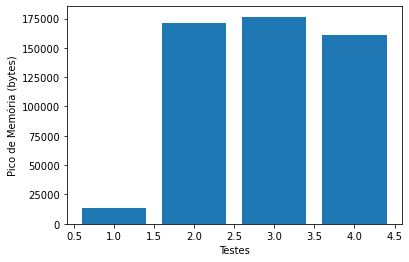

In [24]:
plt.bar([1, 2, 3, 4], [pico1r, pico2r, pico3r, pico4r])
plt.ylabel('Pico de Memória (bytes)')
plt.xlabel('Testes')
plt.show()

Como esperado, com o aumento da entrada houve um aumento considerável no pico de memória durante a execução do algoritmo.

###### Tempo:

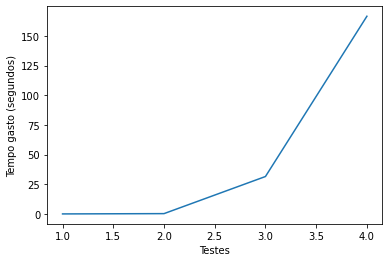

In [25]:
plt.plot([1, 2, 3, 4], [t1r, t2r, t3r, t4r])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

É insteressante notar que, já no o terceiro teste, o tempo distancia-se comparado aos testes 1 e 2. Ainda, é só no quarto e maior teste que o tempo gasto dispara astronomicamente, o que exemplifica a característica do custo exponencial do algoritmo.

### Crescimento do Algoritmo Memoizado, de acordo com o crescimento da entrada:

###### Memória:

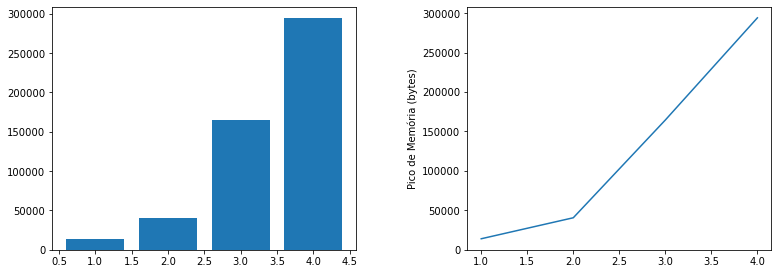

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))


ax[0].bar([1, 2, 3, 4], [pico1m, pico2m, pico3m, pico4m])
ax[1].set_ylabel('Pico de Memória (bytes)')
ax[1].set_label('Testes')


ax[1].plot([1, 2, 3, 4], [pico1m, pico2m, pico3m, pico4m])
ax[1].set_ylabel('Pico de Memória (bytes)')
ax[1].set_label('Testes')

fig.tight_layout(pad=5.0)
plt.show()

Como esperado, o algoritmo memoizado apresenta um custo alto em termos de memória. Além disso, sua curva de crescimento é quase que linear de acordo com o crescimento das entradas apresentadas.

###### Tempo:

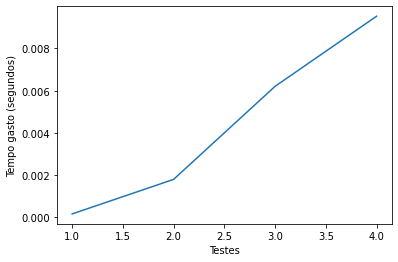

In [27]:
plt.plot([1, 2, 3, 4], [t1m, t2m, t3m, t4m])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

O crescimento do tempo consumido para com o tamanho da entrada é quase linear. Assimilando-se à curva de crescimento do consumo de memória. Porém, nota-se um crescimento mais acentuado entre os testes 2 e 3

### Crescimento do Algoritmo de Programação Dinâmica, de acordo com o crescimento da entrada:

###### Memória:

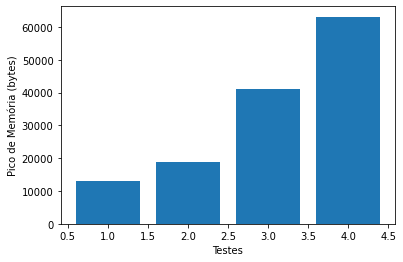

In [28]:
plt.bar([1, 2, 3, 4], [pico1p, pico2p, pico3p, pico4p])

plt.ylabel('Pico de Memória (bytes)')
plt.xlabel('Testes')
plt.show()

Para os dois primeiros testes, o pico de memória é relativamente baixo, contudo, a partir do terceiro teste, há um consumo muito maior de memória. Acredita-se que isso se dá devido ao uso da estrutura de dados matricial de tamanho: $n * k$ (com n = Tamanho do subconjunto e k = Capacidade da mochila).


###### Tempo:

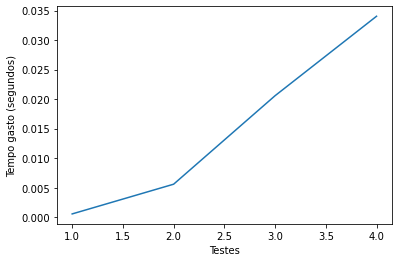

In [29]:
plt.plot([1, 2, 3, 4], [t1p, t2p, t3p, t4p])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

Mesmo o custo em memória sendo tão distinto para os pares de testes, a curva de tempo gasto segue uma apresentação de crescimento quase linear.

### Crescimento do Algoritmo de Aproximação, de acordo com o crescimento da entrada:

###### Memória:

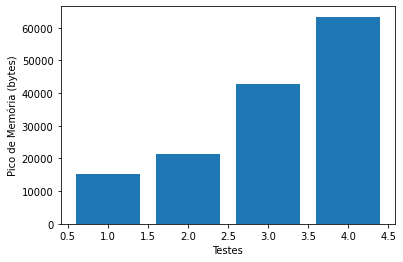

In [30]:
plt.bar([1, 2, 3, 4], [pico1a, pico2a, pico3a, pico4a])
plt.ylabel('Pico de Memória (bytes)')
plt.xlabel('Testes')
plt.show()

Como o algoritmo re-utiliza código do algoritmo de Programação Dinâmica, é de se esperar que os resultados sejam muito próximos.

###### Tempo:

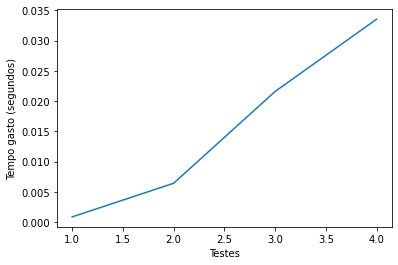

In [31]:
plt.plot([1, 2, 3, 4], [t1a, t2a, t3a, t4a])
plt.ylabel('Tempo gasto (segundos)')
plt.xlabel('Testes')
plt.show()

Como o algoritmo re-utiliza código do algoritmo de Programação Dinâmica, é de se esperar que os resultados sejam muito próximos.

<h3><center> Testes Coletivos: </center></h3>

## Comparativo 1

###  Análise de Tempo e Memória em detrimento do tamanho da entrada para os três primeiros algoritmos.

<h3><center> Teste 1: </center></h3>

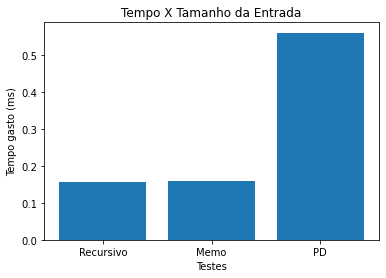

In [32]:
plt.bar(['Recursivo', 'Memo', 'PD'], [t1r*1000, t1m*1000, t1p*1000])
plt.ylabel('Tempo gasto (ms)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

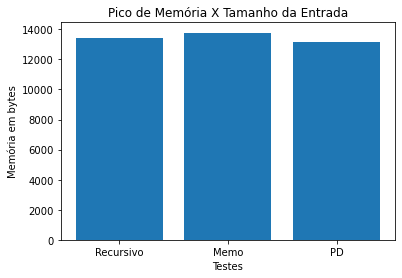

In [33]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico1r, pico1m, pico1p])
plt.ylabel('Memória em bytes')
plt.xlabel('Testes')
plt.title('Pico de Memória X Tamanho da Entrada')
plt.show()

<h4><center> Conclusão: </center></h4>

O teste 1 apresenta uma entrada muito pequena, o que torna difícil tirar alguma conclusão. Embora o gráfico de tempo distoe um pouco para os diferentes algoritmos, trata-se de uma escala muito pequena. Também, o pico de memória é muito próximo para os mesmos.

<h3><center> Teste 2: </center></h3>

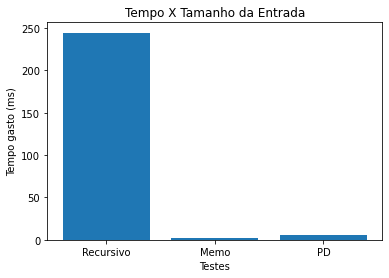

In [34]:
plt.bar(['Recursivo', 'Memo', 'PD'], [t2r*1000, t2m*1000, t2p*1000])
plt.ylabel('Tempo gasto (ms)')
plt.xlabel('Testes')
plt.title('Tempo X Tamanho da Entrada')
plt.show()

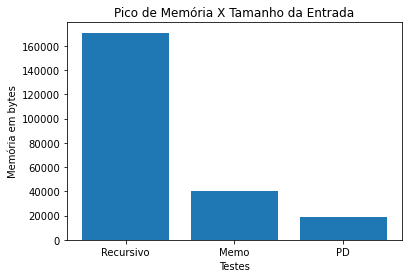

In [35]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico2r, pico2m, pico2p])
plt.ylabel('Memória em bytes')
plt.xlabel('Testes')
plt.title('Pico de Memória X Tamanho da Entrada')
plt.show()

<h4><center> Conclusão: </center></h4>

Neste teste já é possível notar os efeitos do recalculo e da complexidade exponencial do algoritmo recursivo. Ainda que numa escala de tempo pequeno (alguns milissegundos), o algoritmo recursivo executou em um tempo mais de 20 vezes maior do que o algoritmo de Programação Dinâmica. Além disso, seu pico de memória registrado também foi muito superior. 

<h3><center> Teste 3: </center></h3>

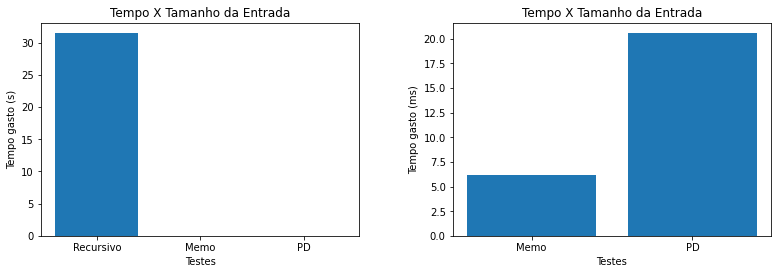

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(['Recursivo', 'Memo', 'PD'], [t3r, t3m, t3p])
ax[0].set_ylabel('Tempo gasto (s)')
ax[0].set_xlabel('Testes')
ax[0].set_title('Tempo X Tamanho da Entrada')

ax[1].bar(['Memo', 'PD'], [t3m*1000, t3p*1000])
ax[1].set_ylabel('Tempo gasto (ms)')
ax[1].set_xlabel('Testes')
ax[1].set_title('Tempo X Tamanho da Entrada')

fig.tight_layout(pad=5.0)
plt.show()

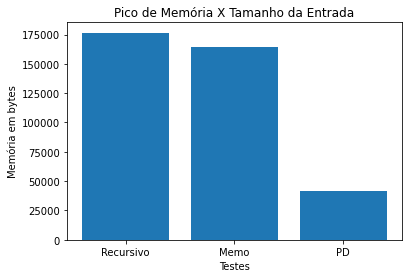

In [37]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico3r, pico3m, pico3p])
plt.ylabel('Memória em bytes')
plt.xlabel('Testes')
plt.title('Pico de Memória X Tamanho da Entrada')
plt.show()

<h4><center> Conclusão: </center></h4>

Conforme cresce a entrada, mais o algoritmo recursivo se distancia dos outros em termos de tempo gasto, seguindo a mesma ou semelhante lógica para o teste passado. Contudo, em termos de pico de memória, o algoritmo recursivo não destoou muito do teste passado, diferente do algoritmo memoizado, que teve um aumento considerável, se aproximando do pico do algoritmo recursivo.

<h3><center> Teste 4: </center></h3>

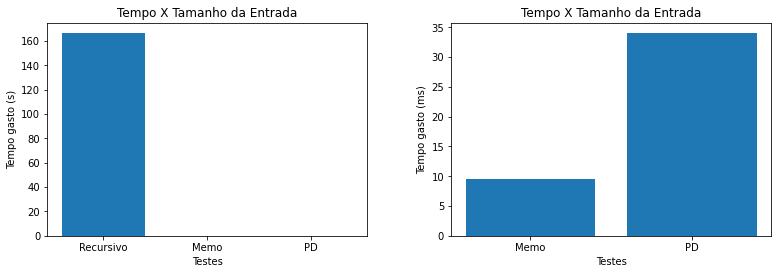

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(['Recursivo', 'Memo', 'PD'], [t4r, t4m, t4p])
ax[0].set_ylabel('Tempo gasto (s)')
ax[0].set_xlabel('Testes')
ax[0].set_title('Tempo X Tamanho da Entrada')

ax[1].bar(['Memo', 'PD'], [t4m*1000, t4p*1000])
ax[1].set_ylabel('Tempo gasto (ms)')
ax[1].set_xlabel('Testes')
ax[1].set_title('Tempo X Tamanho da Entrada')

fig.tight_layout(pad=5.0)
plt.show()

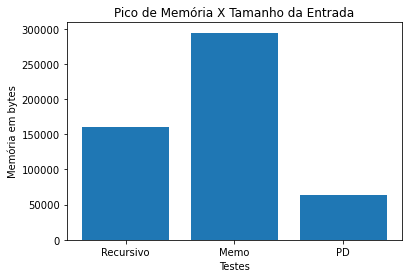

In [39]:
plt.bar(['Recursivo', 'Memo', 'PD'], [pico4r, pico4m, pico4p])
plt.ylabel('Memória em bytes')
plt.xlabel('Testes')
plt.title('Pico de Memória X Tamanho da Entrada')
plt.show()

<h4><center> Conclusão: </center></h4>

Mesmo apresentando um tempo, em média menor, esse teste mostrou que o algoritmo memoizado tende a consumir muito mais memória a partir de um crescimento/tamanho da entrada, visto que os outros algoritmos apresentaram um crescimento brando/estável no pico de memória, diferentemente do memoizado.

### Conclusão do Comparativo 1:

Os testes demonstram bem as limitações do algoritmo recursivo, que mesmo mantendo um pico de memória estável conforme o crescimento da entrada, apresentou um crescimento altíssimo em termos de tempo gasto. 

Os algoritmos memoizado e de programação dinâmica se mostram muito melhores em termos de tempo gasto, se mantendo na casa do milissegundos para todas as entradas testadas.

Mesmo apresentando um tempo, em média, menor quando comparado ao algoritmo de PD, o algoritmo memoizado tende a consumir muito mais memória a partir de um crescimento/tamanho da entrada (como ficou exemplificado no teste 4). Por isso, acredita-se que esse seria um fator limitante ainda mais precoce para o algoritmo memoizado, nos levando a crer que o algoritmo de Programação Dinâmica (PD) apresenta o melhor desempenho em termos de tempo-memória.

## Comparativo 2

<h2><center> Testes de Corretude: </center></h2>

<div class="alert alert-block alert-warning"><b>Metodologia: </b> Os testes consistem em executar os algoritmos de Programação Dinâmica e de Aproximação com a mesma entrada (a maior entrada utilizda nos testes), e então avaliar, dentre outras coisas, a corretude da aproximação ao variar o valor de "ε"</div>

<h4><center> ε = 0,2 </center></h4>

In [40]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4, 0.20)

end = timer()
_, pico02 = tracemalloc.get_traced_memory()
tracemalloc.stop()

t02 = end - start
r02 = mochila.resposta
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t02}s")
print(f"Pico de memória: {pico02}b")

ε = 0.2
Resultado: 714.0
Tempo gasto: 0.033703600000023926s
Pico de memória: 63615b


<h4><center> ε = 0,3 </center></h4>

In [41]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4, 0.30)

end = timer()
_, pico03 = tracemalloc.get_traced_memory()
tracemalloc.stop()

t03 = end - start
r03 = mochila.resposta
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t03}s")
print(f"Pico de memória: {pico03}b")

ε = 0.3
Resultado: 475.0
Tempo gasto: 0.034214700000006815s
Pico de memória: 63632b


<h4><center> ε = 0,4 </center></h4>

In [42]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4, 0.40)

end = timer()
_, pico04 = tracemalloc.get_traced_memory()
tracemalloc.stop()

t04 = end - start
r04 = mochila.resposta
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t04}s")
print(f"Pico de memória: {pico04}b")

ε = 0.4
Resultado: 352.0
Tempo gasto: 0.0339341000000104s
Pico de memória: 64288b


<h4><center> ε = 0,5 </center></h4>

In [43]:
mochila = MochilaA()
tracemalloc.start()
start = timer()

mochila.resolve(130, lista_coisas4, 0.50)

end = timer()
_, pico05 = tracemalloc.get_traced_memory()
tracemalloc.stop()

t05 = end - start
r05 = mochila.resposta
print(f"Resultado: {mochila.resposta}")
print(f"Tempo gasto: {t05}s")
print(f"Pico de memória: {pico05}b")

ε = 0.5
Resultado: 281.0
Tempo gasto: 0.03381820000004154s
Pico de memória: 64352b


### Conclusão do Comparativo 2:

Considerando que a respsota ótima para o teste é: 769

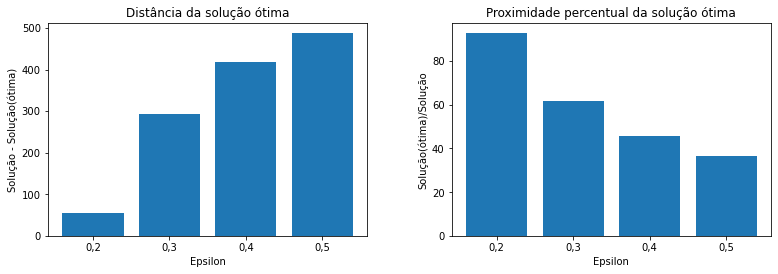

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(['0,2', '0,3', '0,4', '0,5'], [769-r02, 769-r03, 769-r04, 769-r05])
ax[0].set_ylabel('Solução - Solução(ótima)')
ax[0].set_xlabel('Epsilon')
ax[0].set_title('Distância da solução ótima')

ax[1].bar(['0,2', '0,3', '0,4', '0,5'], [(r02*100)/769, (r03*100)/769, (r04*100)/769, (r05*100)/769])
ax[1].set_ylabel('Solução(ótima)/Solução')
ax[1].set_xlabel('Epsilon')
ax[1].set_title('Proximidade percentual da solução ótima')

fig.tight_layout(pad=5.0)
plt.show()

#### Tempo e memória

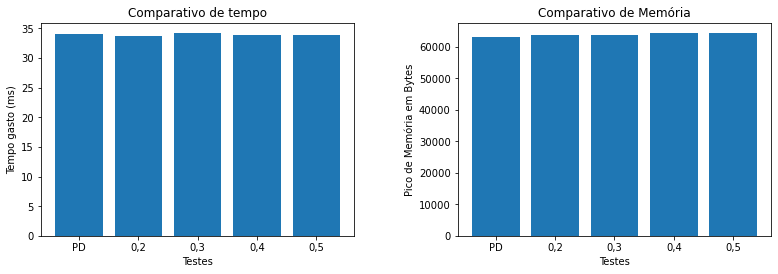

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(['PD', '0,2', '0,3', '0,4', '0,5'], [t4p*1000, t02*1000, t03*1000, t04*1000, t05*1000])
ax[0].set_ylabel('Tempo gasto (ms)')
ax[0].set_xlabel('Testes')
ax[0].set_title('Comparativo de tempo')

ax[1].bar(['PD', '0,2', '0,3', '0,4', '0,5'], [pico4p, pico02, pico03, pico04, pico05])
ax[1].set_ylabel('Pico de Memória em Bytes')
ax[1].set_xlabel('Testes')
ax[1].set_title('Comparativo de Memória')

fig.tight_layout(pad=5.0)
plt.show()

Como esperado, o algoritmo erra, mas não erra muito para valores pequenos de Epsilon.

Contudo, não foi possível perceber uma alteração no tempo gasto para executar o teste, diferente do cenário proposto em sala, em que: quanto maior o valor de epsilon, mais rápido seria o algoritmo, mas também mais impreciso.

Sim, a imprecisão é claramente notável, mas o tempo gasto para executar não.

Além disso, ressaltamos que o comparativo de memória atende ao esperado, visto que o pré-processamento de dados do algoritmo de aproximação não deve apresentar um custo em memória relevante, quando comparado à matriz de dados de tamanho $ 𝑛∗𝑘 $ (com n = Tamanho do subconjunto e k = Capacidade da mochila) presente em ambos.